[6]


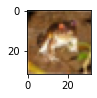

[9]


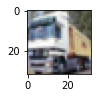

[9]


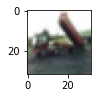

[4]


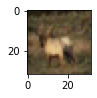

[1]


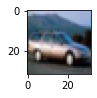

[1]


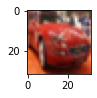

[2]


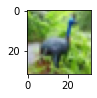

[7]


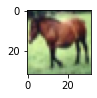

[8]


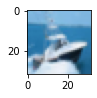

In [14]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D, Flatten, Dense
import numpy as np

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x = x_test

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
  print(y_train[i])
  plt.show()

In [15]:
# Dat ten cho cac classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [16]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [17]:
# MODEL CNN
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D

model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(32,32,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 3
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

#output
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [18]:
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train, batch_size=64, epochs=60, verbose=1, validation_data=(x_test,y_test))

Epoch 1/60
782/782 [==============================] - 19s 23ms/step - loss: 1.5995 - accuracy: 0.4138 - val_loss: 1.2997 - val_accuracy: 0.5332
Epoch 2/60
782/782 [==============================] - 19s 25ms/step - loss: 1.1061 - accuracy: 0.6071 - val_loss: 0.9840 - val_accuracy: 0.6516
Epoch 3/60
782/782 [==============================] - 17s 22ms/step - loss: 0.8845 - accuracy: 0.6855 - val_loss: 0.9252 - val_accuracy: 0.6827
Epoch 4/60
782/782 [==============================] - 18s 23ms/step - loss: 0.7499 - accuracy: 0.7363 - val_loss: 0.8937 - val_accuracy: 0.6968
Epoch 5/60
782/782 [==============================] - 17s 22ms/step - loss: 0.6424 - accuracy: 0.7749 - val_loss: 0.7867 - val_accuracy: 0.7310
Epoch 6/60
782/782 [==============================] - 17s 22ms/step - loss: 0.5581 - accuracy: 0.8038 - val_loss: 0.7728 - val_accuracy: 0.7463
Epoch 7/60
782/782 [==============================] - 17s 22ms/step - loss: 0.4798 - accuracy: 0.8314 - val_loss: 0.8012 - val_accuracy:

In [21]:
model.save('cifar10_CNN.h5')

In [22]:
from keras.models import load_model
models = load_model('cifar10_CNN.h5')

In [23]:
score = model.evaluate(x_test, y_test,verbose=1)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])

313/313 [==============================] - 3s 8ms/step - loss: 1.6610 - accuracy: 0.7512
Test loss=  1.6610181331634521
Test accuracy=  0.7512000203132629


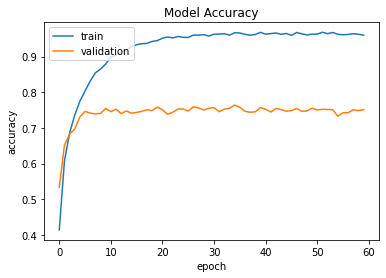

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

In [25]:
y_predict = model.predict(x_test)

# Tạo một index và dự đoán 
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_classes = y_predict[random_index]

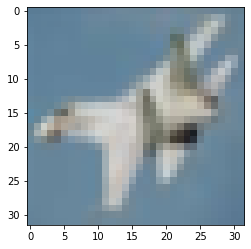

airplane


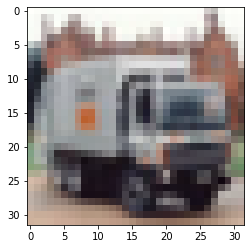

truck


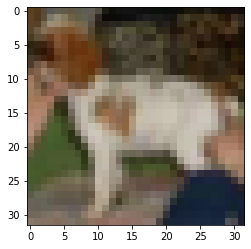

dog


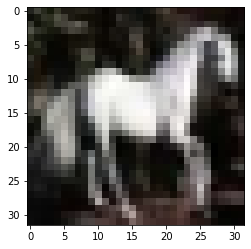

horse


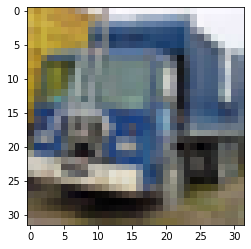

truck


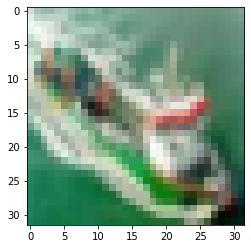

ship


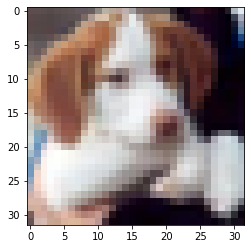

dog


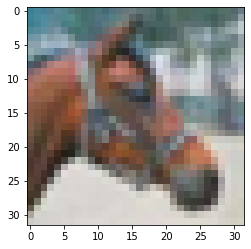

cat


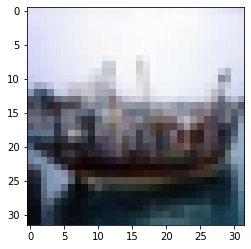

ship


In [26]:
for i in range(9):
    plt.imshow(x[10+i])
    plt.show()
    print(classes[np.argmax(y_predict[10+i])])